In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Part A.

In [2]:
DataFrame=pd.read_csv('hour.csv')

In [3]:
DataFrame

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
X=DataFrame[['hr']]

In [5]:
Xnorm=(X-X.mean(axis=0))/X.std(axis=0)

In [6]:
Y=DataFrame[['cnt']]

In [7]:
Ynorm=(Y-Y.mean(axis=0))/Y.std(axis=0)

Text(0, 0.5, 'Count of Total Rental Bikes')

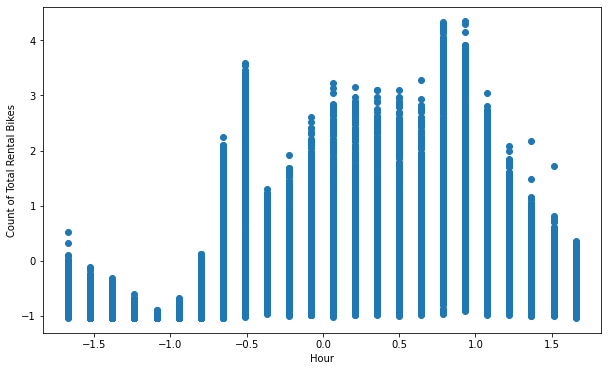

In [8]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')

# Part B.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [10]:
poly1=PolynomialFeatures(1)
poly2=PolynomialFeatures(2)
poly3=PolynomialFeatures(3)
poly4=PolynomialFeatures(4)
poly5=PolynomialFeatures(5)
poly6=PolynomialFeatures(6)
poly7=PolynomialFeatures(7)
poly8=PolynomialFeatures(8)
poly9=PolynomialFeatures(9)
poly10=PolynomialFeatures(10)
poly11=PolynomialFeatures(11)
poly12=PolynomialFeatures(12)

In [11]:
Xnorm1=poly1.fit_transform(Xnorm)
Xnorm2=poly2.fit_transform(Xnorm)
Xnorm3=poly3.fit_transform(Xnorm)
Xnorm4=poly4.fit_transform(Xnorm)
Xnorm5=poly5.fit_transform(Xnorm)
Xnorm6=poly6.fit_transform(Xnorm)
Xnorm7=poly7.fit_transform(Xnorm)
Xnorm8=poly8.fit_transform(Xnorm)
Xnorm9=poly9.fit_transform(Xnorm)
Xnorm10=poly10.fit_transform(Xnorm)
Xnorm11=poly11.fit_transform(Xnorm)
Xnorm12=poly12.fit_transform(Xnorm)

In [12]:
Xs=[]
Xs.append(Xnorm1)
Xs.append(Xnorm2)
Xs.append(Xnorm3)
Xs.append(Xnorm4)
Xs.append(Xnorm5)
Xs.append(Xnorm6)
Xs.append(Xnorm7)
Xs.append(Xnorm8)
Xs.append(Xnorm9)
Xs.append(Xnorm10)
Xs.append(Xnorm11)
Xs.append(Xnorm12)


In [13]:
r2=[]
MSE=[]
Y_hat=[]
for i in range(0,12):
    ridge=Ridge(alpha=10**(-8))
    ridge.fit(Xs[i],Ynorm)
    Y_hat.append(ridge.predict(Xs[i]))
    MSE.append(np.mean((Ynorm-Y_hat[i])**2))
    r2.append(r2_score(Ynorm,Y_hat[i]))

D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.93583e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
D:\Users\ASUS-C\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17484e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Text(0.5, 1.0, 'R**2 and MSE of Ridge (λ = 1e-8)')

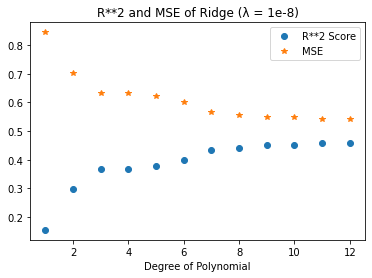

In [14]:
plt.plot(range(1,13),r2,'o',label='R**2 Score')
plt.plot(range(1,13),MSE,'*',label='MSE')
plt.xlabel('Degree of Polynomial')
plt.legend(loc='upper right')
#plt.xscale('log')
plt.title('R**2 and MSE of Ridge (λ = 1e-8)')

Text(0.5, 1.0, 'Polynomial Degree = 1')

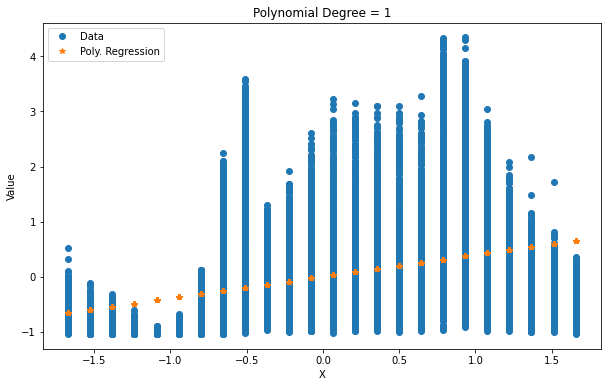

In [15]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[0],'*',label='Poly. Regression')
plt.xlabel('X')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 1')

Text(0.5, 1.0, 'Polynomial Degree = 2')

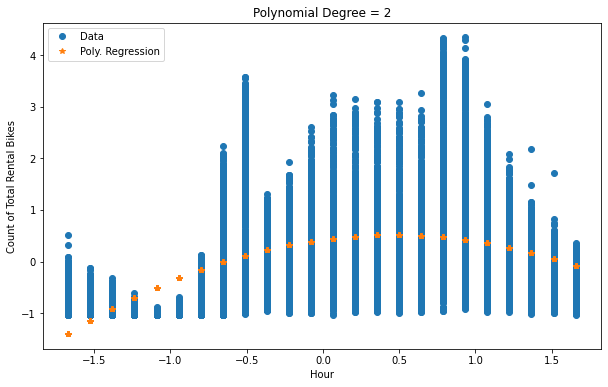

In [16]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[1],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 2')

Text(0.5, 1.0, 'Polynomial Degree = 3')

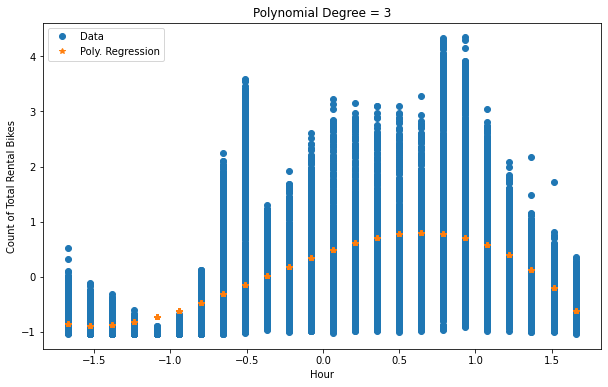

In [17]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[2],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 3')

Text(0.5, 1.0, 'Polynomial Degree = 4')

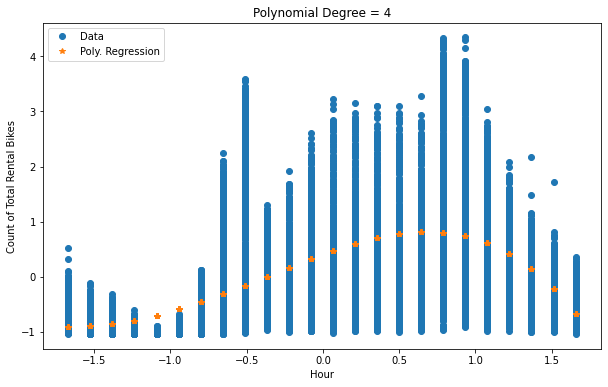

In [18]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[3],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 4')

Text(0.5, 1.0, 'Polynomial Degree = 5')

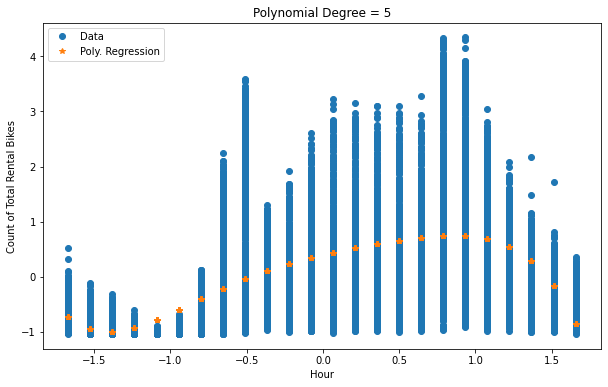

In [19]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[4],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 5')

Text(0.5, 1.0, 'Polynomial Degree = 6')

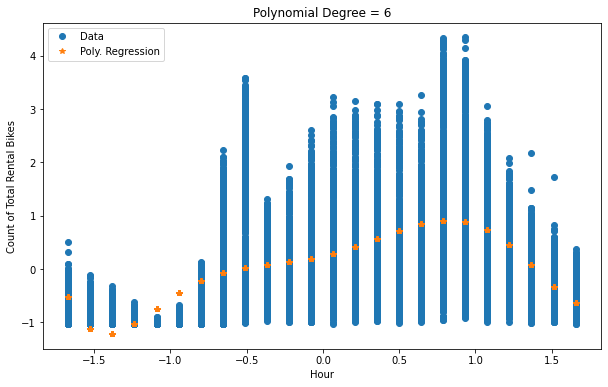

In [20]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[5],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 6')

Text(0.5, 1.0, 'Polynomial Degree = 7')

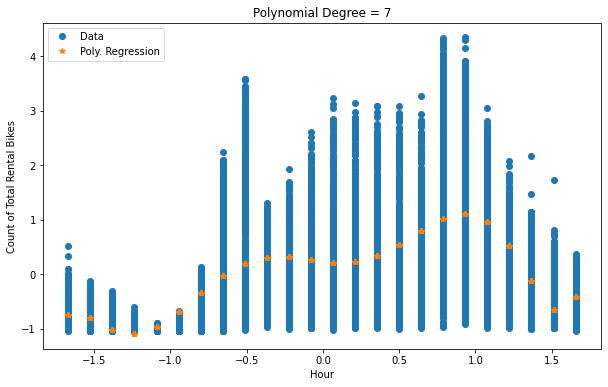

In [21]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[6],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 7')

Text(0.5, 1.0, 'Polynomial Degree = 8')

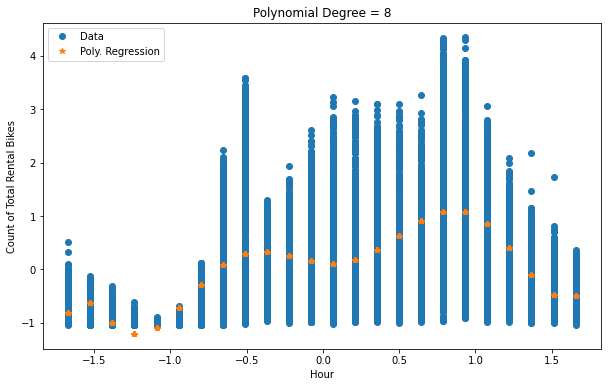

In [22]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[7],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 8')

Text(0.5, 1.0, 'Polynomial Degree = 9')

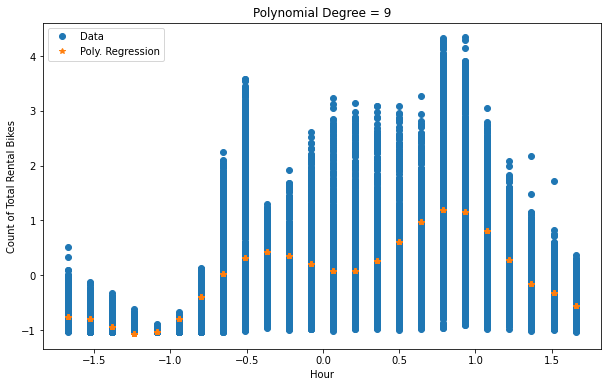

In [23]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[8],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 9')

Text(0.5, 1.0, 'Polynomial Degree = 10')

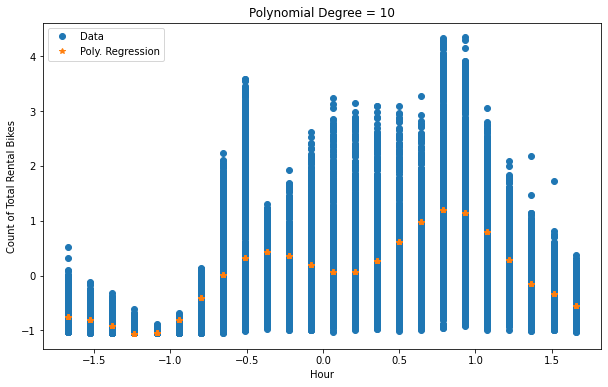

In [24]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[9],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 10')

Text(0.5, 1.0, 'Polynomial Degree = 11')

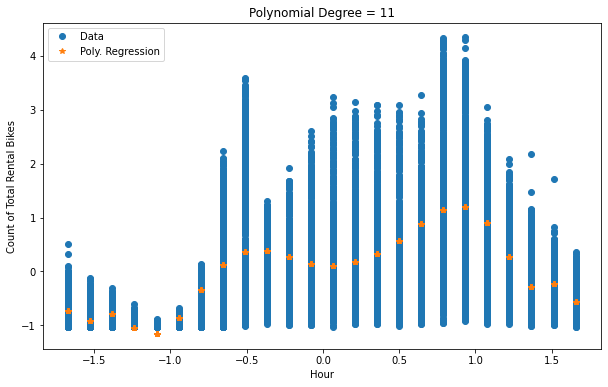

In [25]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[10],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 11')

Text(0.5, 1.0, 'Polynomial Degree = 12')

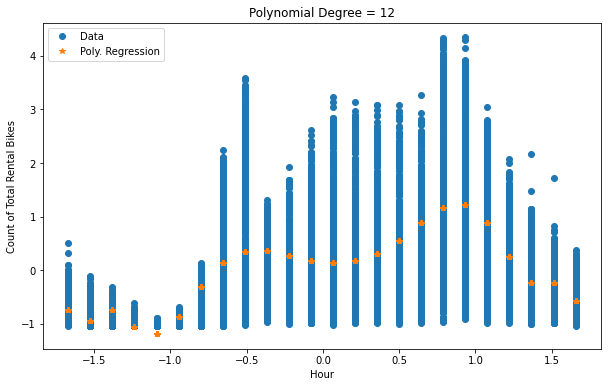

In [26]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Data')
plt.plot(Xnorm,Y_hat[11],'*',label='Poly. Regression')
plt.xlabel('Hour')
plt.ylabel('Count of Total Rental Bikes')
plt.legend(loc='upper left')
plt.title('Polynomial Degree = 12')

# Part C.

In [27]:
X=np.linspace(0,1,500)

In [28]:
from sklearn.preprocessing import SplineTransformer

In [29]:
spline_0=SplineTransformer(degree=0, n_knots=6)
Y0=spline_0.fit_transform(X.reshape(-1, 1))

In [30]:
spline_1=SplineTransformer(degree=1, n_knots=6)
Y1=spline_1.fit_transform(X.reshape(-1, 1))

In [31]:
spline_2=SplineTransformer(degree=2, n_knots=6)
Y2=spline_2.fit_transform(X.reshape(-1, 1))

In [32]:
spline_3=SplineTransformer(degree=3, n_knots=6)
Y3=spline_3.fit_transform(X.reshape(-1, 1))

In [33]:
Y2

array([[5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.90030161e-01, 5.09919639e-01, 5.02006016e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.80160722e-01, 5.19638475e-01, 2.00802406e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.00802406e-04, 5.19638475e-01, 4.80160722e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.02006016e-05, 5.09919639e-01, 4.90030161e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 5.00000000e-01]])

Text(0.5, 1.0, 'Knots = 6 , Degree = 0')

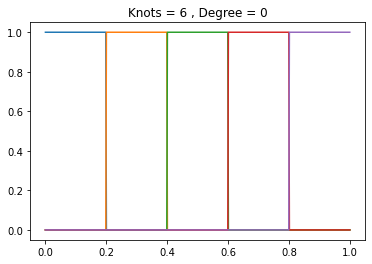

In [34]:
plt.plot(X,Y0)
plt.title('Knots = 6 , Degree = 0')

Text(0.5, 1.0, 'Knots = 6 , Degree = 1')

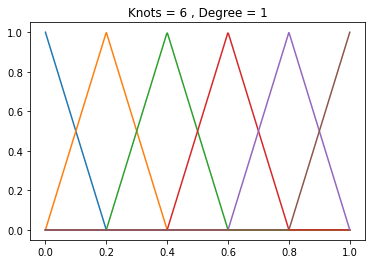

In [35]:
plt.plot(X,Y1)
plt.title('Knots = 6 , Degree = 1')

Text(0.5, 1.0, 'Knots = 6 , Degree = 2')

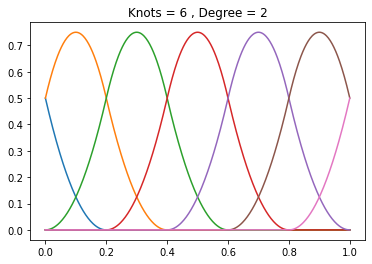

In [36]:
plt.plot(X,Y2)
plt.title('Knots = 6 , Degree = 2')

Text(0.5, 1.0, 'Knots = 6 , Degree = 3')

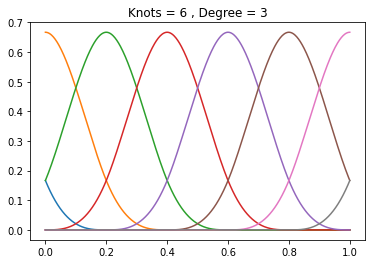

In [37]:
plt.plot(X,Y3)
plt.title('Knots = 6 , Degree = 3')

# Part D.

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
X=DataFrame[['hr']]
Xnorm=(X-X.mean(axis=0))/X.std(axis=0)
Y=DataFrame[['cnt']]
Ynorm=(Y-Y.mean(axis=0))/Y.std(axis=0)

In [40]:
BaseLine=SplineTransformer(degree=3, n_knots=6, knots='uniform', extrapolation='constant')
X_BaseLine=BaseLine.fit_transform(Xnorm)

In [41]:
rdg_BaseLine=Ridge(alpha=1e-8)
rdg_BaseLine.fit(X_BaseLine,Ynorm)
Y_hat_BaseLine=(rdg_BaseLine.predict(X_BaseLine))

Text(0.5, 1.0, 'Knots = 6 , Degree = 3')

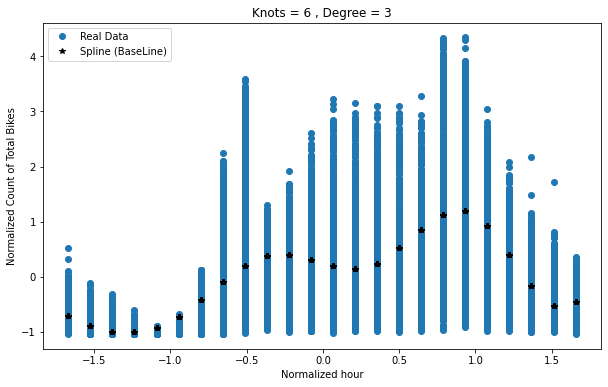

In [42]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_BaseLine,'k*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 6 , Degree = 3')

In [43]:
MSE_BaseLine=mean_squared_error(Ynorm,Y_hat_BaseLine)

# Part E.

In [44]:
Ext_model=SplineTransformer(degree=3, n_knots=6, knots='uniform', extrapolation='periodic')
X_Ext_model=Ext_model.fit_transform(Xnorm)

In [45]:
rdg_Ext_model=Ridge(alpha=1e-8)
rdg_Ext_model.fit(X_Ext_model,Ynorm)
Y_hat_Ext_model=(rdg_Ext_model.predict(X_Ext_model))

Text(0.5, 1.0, 'Knots = 6 , Degree = 3')

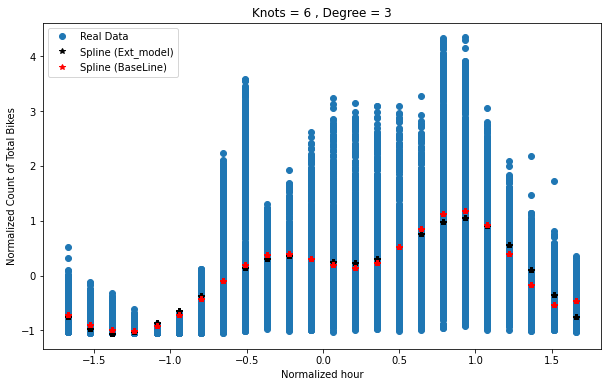

In [46]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Ext_model,'k*',label='Spline (Ext_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 6 , Degree = 3')

In [47]:
MSE_Ext_model=mean_squared_error(Ynorm,Y_hat_Ext_model)

# ---------------------------------------------------------------------------------------------------------------

In [48]:
Knots_model_1=SplineTransformer(degree=1, n_knots=6, knots='uniform', extrapolation='constant')
X_Knots_model_1=Knots_model_1.fit_transform(Xnorm)

In [49]:
rdg_Knots_model_1=Ridge(alpha=1e-8)
rdg_Knots_model_1.fit(X_Knots_model_1,Ynorm)
Y_hat_Knots_model_1=(rdg_Knots_model_1.predict(X_Knots_model_1))

Text(0.5, 1.0, 'Knots = 6 , Degree = 1')

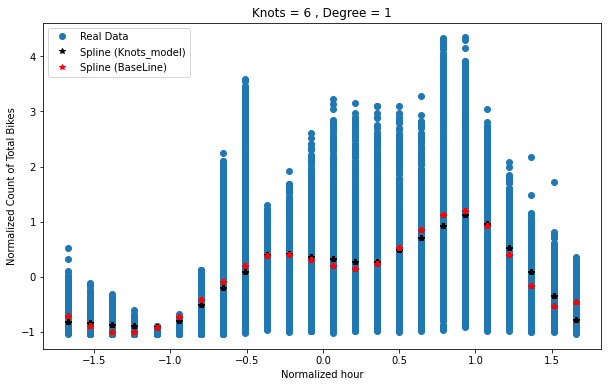

In [50]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Knots_model_1,'k*',label='Spline (Knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 6 , Degree = 1')

In [51]:
MSE_Knots_model_1=mean_squared_error(Ynorm,Y_hat_Knots_model_1)

--------------------------------------------------------------------------------------------------------------------------------

In [52]:
Knots_model_4=SplineTransformer(degree=4, n_knots=6, knots='uniform', extrapolation='constant')
X_Knots_model_4=Knots_model_4.fit_transform(Xnorm)

In [53]:
rdg_Knots_model_4=Ridge(alpha=1e-8)
rdg_Knots_model_4.fit(X_Knots_model_4,Ynorm)
Y_hat_Knots_model_4=(rdg_Knots_model_4.predict(X_Knots_model_4))

Text(0.5, 1.0, 'Knots = 6 , Degree = 4')

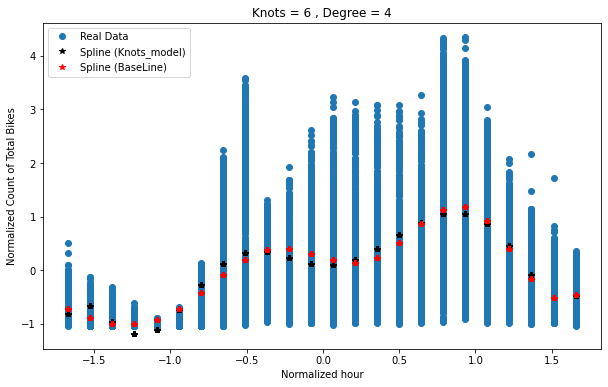

In [54]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Knots_model_4,'k*',label='Spline (Knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 6 , Degree = 4')

In [55]:
MSE_Knots_model_4=mean_squared_error(Ynorm,Y_hat_Knots_model_4)

# ------------------------------------------------------------------------------------------------------------

In [56]:
Deg_model=SplineTransformer(degree=3, n_knots=6, knots='quantile', extrapolation='constant')
X_Deg_model=Deg_model.fit_transform(Xnorm)

In [57]:
rdg_Deg_model=Ridge(alpha=1e-8)
rdg_Deg_model.fit(X_Deg_model,Ynorm)
Y_hat_Deg_model=(rdg_Deg_model.predict(X_Deg_model))

Text(0.5, 1.0, 'Knots = 6 , Degree = 3')

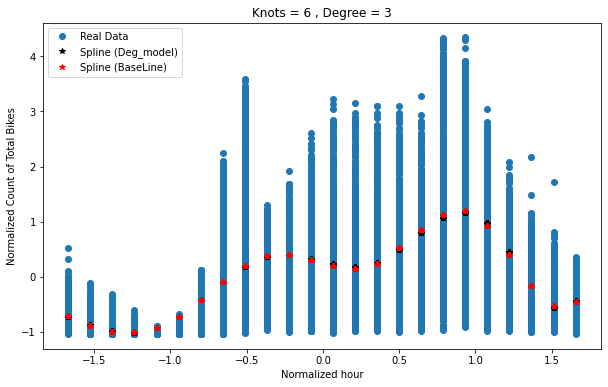

In [58]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Deg_model,'k*',label='Spline (Deg_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 6 , Degree = 3')

In [59]:
MSE_Deg_model=mean_squared_error(Ynorm,Y_hat_Deg_model)

# --------------------------------------------------------------------------------------------------------------

In [60]:
Nknots_model_3=SplineTransformer(degree=3, n_knots=3, knots='uniform', extrapolation='constant')
X_Nknots_model_3=Nknots_model_3.fit_transform(Xnorm)

In [61]:
rdg_Nknots_model_3=Ridge(alpha=1e-8)
rdg_Nknots_model_3.fit(X_Nknots_model_3,Ynorm)
Y_hat_Nknots_model_3=(rdg_Nknots_model_3.predict(X_Nknots_model_3))

Text(0.5, 1.0, 'Knots = 3 , Degree = 3')

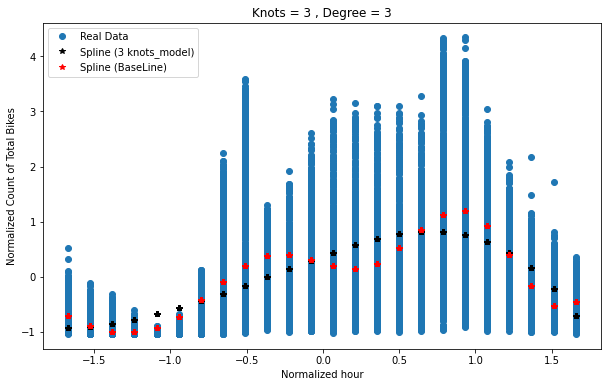

In [62]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Nknots_model_3,'k*',label='Spline (3 knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 3 , Degree = 3')

In [63]:
MSE_Nknots_model_3=mean_squared_error(Ynorm,Y_hat_Nknots_model_3)

------------------------------------------------------------------------------------------------------------------------------

In [64]:
Nknots_model_9=SplineTransformer(degree=3, n_knots=9, knots='uniform', extrapolation='constant')
X_Nknots_model_9=Nknots_model_9.fit_transform(Xnorm)

In [65]:
rdg_Nknots_model_9=Ridge(alpha=1e-8)
rdg_Nknots_model_9.fit(X_Nknots_model_9,Ynorm)
Y_hat_Nknots_model_9=(rdg_Nknots_model_9.predict(X_Nknots_model_9))

Text(0.5, 1.0, 'Knots = 9 , Degree = 3')

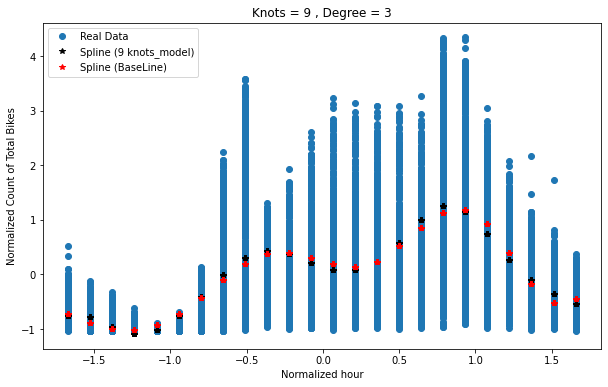

In [66]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Nknots_model_9,'k*',label='Spline (9 knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 9 , Degree = 3')

In [67]:
MSE_Nknots_model_9=mean_squared_error(Ynorm,Y_hat_Nknots_model_9)

------------------------------------------------------------------------------------------------------------------------------

In [68]:
Nknots_model_12=SplineTransformer(degree=3, n_knots=12, knots='uniform', extrapolation='constant')
X_Nknots_model_12=Nknots_model_12.fit_transform(Xnorm)

In [69]:
rdg_Nknots_model_12=Ridge(alpha=1e-8)
rdg_Nknots_model_12.fit(X_Nknots_model_12,Ynorm)
Y_hat_Nknots_model_12=(rdg_Nknots_model_12.predict(X_Nknots_model_12))

Text(0.5, 1.0, 'Knots = 12 , Degree = 3')

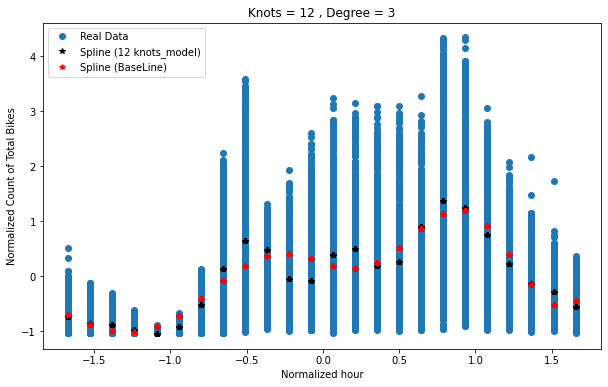

In [70]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Nknots_model_12,'k*',label='Spline (12 knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 12 , Degree = 3')

In [71]:
MSE_Nknots_model_12=mean_squared_error(Ynorm,Y_hat_Nknots_model_12)

-----------------------------------------------------------------------------------------------------------------------------

In [72]:
Nknots_model_18=SplineTransformer(degree=3, n_knots=18, knots='uniform', extrapolation='constant')
X_Nknots_model_18=Nknots_model_18.fit_transform(Xnorm)

In [73]:
rdg_Nknots_model_18=Ridge(alpha=1e-8)
rdg_Nknots_model_18.fit(X_Nknots_model_18,Ynorm)
Y_hat_Nknots_model_18=(rdg_Nknots_model_18.predict(X_Nknots_model_18))

Text(0.5, 1.0, 'Knots = 18 , Degree = 3')

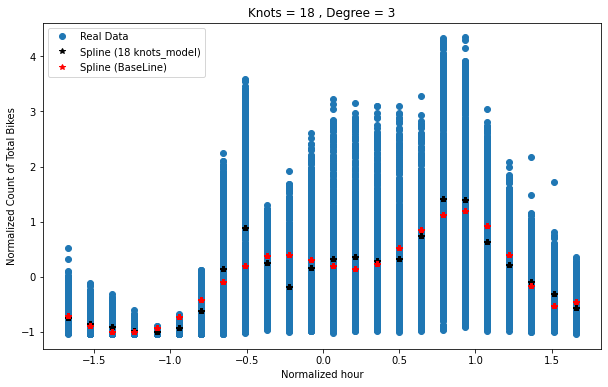

In [74]:
plt.figure(figsize=(10,6))
plt.plot(Xnorm,Ynorm,'o',label='Real Data')
plt.plot(Xnorm,Y_hat_Nknots_model_18,'k*',label='Spline (18 knots_model)')
plt.plot(Xnorm,Y_hat_BaseLine,'r*',label='Spline (BaseLine)')
plt.xlabel('Normalized hour')
plt.ylabel('Normalized Count of Total Bikes')
plt.legend(loc='upper left')
plt.title('Knots = 18 , Degree = 3')

In [75]:
MSE_Nknots_model_18=mean_squared_error(Ynorm,Y_hat_Nknots_model_18)

-------------------------------------------------------------------------------------------------------------------------------

In [76]:
MSEs=[]
MSEs.append(MSE_BaseLine)
MSEs.append(MSE_Ext_model)
MSEs.append(MSE_Knots_model_1)
MSEs.append(MSE_Knots_model_4)
MSEs.append(MSE_Deg_model)
MSEs.append(MSE_Nknots_model_3)
MSEs.append(MSE_Nknots_model_9)
MSEs.append(MSE_Nknots_model_12)
MSEs.append(MSE_Nknots_model_18)

names=['BaseLine','Ext_model','Knots_model_1','Knots_model_4','Deg_model','3 knots_model','9 knots_model','12 knots_model','18 knots_model',]

Text(0.5, 1.0, 'MSE of Different Models')

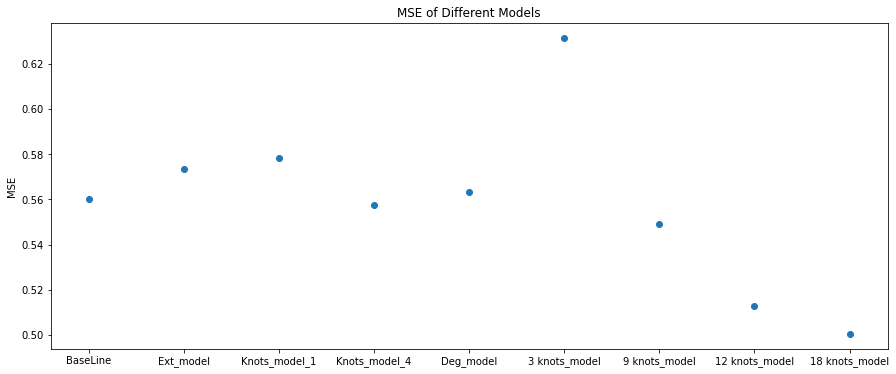

In [77]:
plt.figure(figsize=(15,6))
plt.plot(names,MSEs,'o')
plt.ylabel('MSE')
plt.title('MSE of Different Models')

# Part F.